In [0]:
import pandas as pd
import re

import random
random.seed(1)

!pip install nltk
!pip install gensim
import nltk


nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import operator

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [0]:
liar=pd.read_csv('liar_with_stance.csv')
stop_words = set(stopwords.words('english')) 

In [0]:
sid = SentimentIntensityAnalyzer()

In [0]:
def get_sentiment(sentence):
  stats = sid.polarity_scores(sentence)
  return max(stats.items(), key=operator.itemgetter(1))[0]

In [0]:
def get_sentiment_score(sentence):
  stats = sid.polarity_scores(sentence)
  return stats[max(stats.items(), key=operator.itemgetter(1))[0]]

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
liar['cleanedStatement'] = liar['statement'].map(lambda x: re.sub(r"\W", " ",str(x)))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: re.sub(r'[,\.!?]', " ",str(x)))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: re.sub(r" \d+", " ",str(x)))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: word_tokenize(x.lower()))
liar['cleanedStatement'] = liar['cleanedStatement'].map(lambda x: ' '.join(x))
liar['cleanedStatement'] = liar['cleanedStatement'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
liar['sentiment']        = liar['cleanedStatement'].apply(lambda x: get_sentiment(x))
liar['sentiment_score']  = liar['cleanedStatement'].apply(lambda x: get_sentiment_score(x))
# liar['cleanedStatement'] = list(vectorizer.fit_transform(liar['cleanedStatement']).toarray())

In [0]:
get_sentiment('I am not flying to England.')

'neu'

In [0]:
liar

,Unnamed: 0,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,similar_doc,Stance,cleanedStatement,sentiment,sentiment_score
0,0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,4438,0,says annies list political group supports thir...,neu,0.6670
1,1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1928,1,decline coal start started natural gas took st...,neu,0.8280
2,2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,4477,0,hillary clinton agrees john mccain voting give...,neu,0.5520
3,3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,4051,1,health care reform legislation likely mandate ...,compound,0.7579
4,4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,4299,1,economic turnaround started end term,neu,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",4179,3,larger number shark attacks florida cases vote...,neg,0.5150
10236,10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,1782,1,democrats become party atlanta metro area blacks,neu,0.6900
10237,10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1084,1,says alternative social security operates galv...,neu,0.7450
10238,10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,3647,1,lifting u cuban embargo allowing travel cuba,neu,1.0000


In [0]:
le=LabelEncoder()

# def tfidf(statement):
#   vectorizer = TfidfVectorizer(stop_words='english')
#   return vectorizer.fit_transform([statement]).to_array()


In [0]:
liar

,Unnamed: 0,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,similar_doc,Stance,cleanedStatement,sentiment,sentiment_score
0,0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,4438,0,says annies list political group supports thir...,neu,0.6670
1,1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1928,1,decline coal start started natural gas took st...,neu,0.8280
2,2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,4477,0,hillary clinton agrees john mccain voting give...,neu,0.5520
3,3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,4051,1,health care reform legislation likely mandate ...,compound,0.7579
4,4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,4299,1,economic turnaround started end term,neu,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",4179,3,larger number shark attacks florida cases vote...,neg,0.5150
10236,10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,1782,1,democrats become party atlanta metro area blacks,neu,0.6900
10237,10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1084,1,says alternative social security operates galv...,neu,0.7450
10238,10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,3647,1,lifting u cuban embargo allowing travel cuba,neu,1.0000


In [0]:
def define_fake(item):
  false=['false','barely-true','pants-fire']
  if item in false:
    return 0
  return 1

In [0]:
le_speaker=LabelEncoder()
le_speaker_job_title_code=LabelEncoder()
le_state_info_code=LabelEncoder()
le_speaker_job_title=LabelEncoder()


le_speaker.fit(liar['speaker'].astype(str))
le_speaker_job_title_code.fit(liar['speaker_job_title'].astype(str))
le_state_info_code.fit(liar['state info'].astype(str))
le_speaker_job_title.fit(liar['speaker_job_title'].astype(str))

joblib.dump(le_speaker, 'le_speaker.pkl')
joblib.dump(le_speaker_job_title_code, 'le_speaker_job_title_code.pkl')
joblib.dump(le_state_info_code, 'le_state_info_code.pkl')





liar['speaker_code']=le.fit_transform(liar['speaker'].astype(str))
liar['speaker_job_title_code']=le.fit_transform(liar['speaker_job_title'].astype(str))
liar['state info_code']=le.fit_transform(liar['state info'].astype(str))
liar['sentiment_code']=le.fit_transform(liar['sentiment'].astype(str))
liar['label_code']=le.fit_transform(liar['label'].astype(str))

In [0]:
le_speaker_job_title.transform(['State representative'])

array([869])

In [0]:
liar_clean=liar[['barely_true_counts', 'false_counts', 'half_true_counts','mostly_true_counts', 'pants_on_fire_counts','Stance', 'speaker_code', 'state info_code','speaker_job_title_code','label_code']]

In [0]:
liar_clean

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,Stance,speaker_code,state info_code,speaker_job_title_code,label_code
0,0.0,1.0,0.0,0.0,0.0,0,814,62,869,1
1,0.0,0.0,1.0,1.0,0.0,1,2492,69,867,2
2,70.0,71.0,160.0,163.0,9.0,0,182,19,642,3
3,7.0,19.0,3.0,5.0,44.0,1,272,82,1098,1
4,15.0,9.0,20.0,19.0,2.0,1,428,13,1098,2
...,...,...,...,...,...,...,...,...,...,...
10235,0.0,1.0,1.0,1.0,0.0,3,12,13,1098,3
10236,0.0,0.0,0.0,1.0,0.0,1,36,15,1098,3
10237,4.0,11.0,5.0,3.0,3.0,1,1108,15,1098,2
10238,3.0,1.0,3.0,0.0,0.0,1,1243,13,1098,1


In [0]:
corr=liar_clean.corr()

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


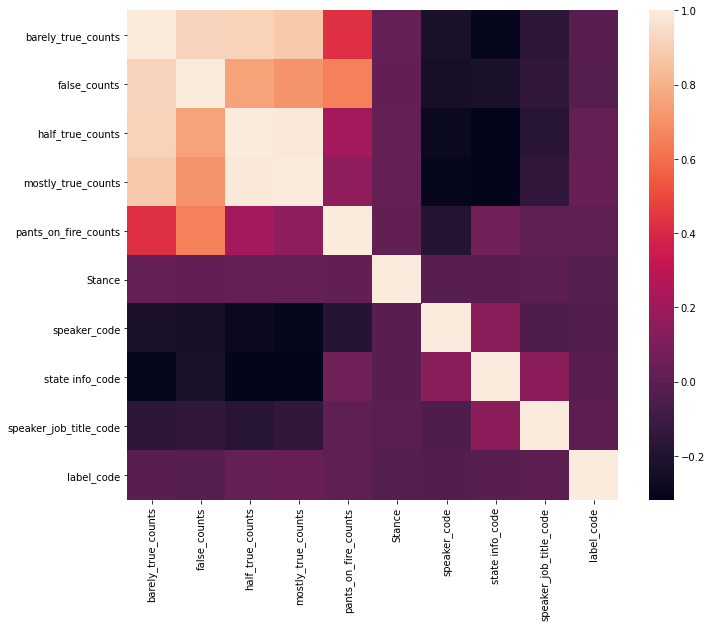

In [0]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr)

In [0]:
from sklearn.metrics import plot_confusion_matrix
def fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test):
  accuracy={}
  specificity={}
  sensitivity={}
  model_save=None
  i=0
  #models_dict holds name and its function , like {'LR':LogsticRegression()}
  for name,model in models_dict.items():
      #fitting model on the train data
      model.fit(X_train,y_train)
      joblib.dump(model, name+'.pkl')
      #predicting model on X_test 
      model_save=model
      y_pred=model.predict(X_test)
      print('*'*100)
      print('Model:',name)
      #printing Confusion matrix an dAccuracy of each model
      print("Confusion Matrix: ")
      print(confusion_matrix(y_test, y_pred))
      print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

      #mainitaing a dictionary of results of accuracy of each model to use it to plot in one systyem
      accuracy[name]=accuracy_score(y_test,y_pred)*100
      cm=confusion_matrix(y_test, y_pred)
      sensitivity[name] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[name] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      print("Classificarion Report : ")
      print(classification_report(y_test, y_pred))
      
  
  #converting dictionaries to dataframes to have them handy
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  
  #plotting accuracy,sensitivity,specificity of each model
  plt.figure(i+1,figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')
  return model_save

In [0]:
liar_clean=liar_clean.fillna(0)
X=liar_clean.loc[:,liar_clean.columns!='label_code']
Y=liar_clean.loc[:,liar_clean.columns=='label_code']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

In [0]:
X_train

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,Stance,speaker_code,state info_code,speaker_job_title_code
6316,0.0,0.0,1.0,1.0,0.0,0,1349,51,223
4332,0.0,0.0,0.0,1.0,0.0,3,791,15,924
8927,2.0,4.0,1.0,2.0,1.0,1,1776,79,252
8957,31.0,39.0,31.0,37.0,8.0,1,1416,2,949
7860,0.0,4.0,2.0,8.0,0.0,1,571,39,949
...,...,...,...,...,...,...,...,...,...
2895,11.0,8.0,5.0,1.0,9.0,1,718,82,1098
7813,15.0,9.0,20.0,19.0,2.0,0,428,13,1098
905,70.0,71.0,160.0,163.0,9.0,1,182,19,642
5192,34.0,32.0,58.0,33.0,19.0,1,1952,28,362


In [0]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
models_dict={}
# models_dict['LinearRegression']       = LinearRegression()
models_dict['LogisticRegression']     = LogisticRegression()
models_dict['Dtree']                  = DecisionTreeClassifier()
models_dict['NB']                     = GaussianNB()
models_dict['XGB']                    = XGBClassifier()
models_dict['RForest']                = RandomForestClassifier()
models_dict['SVM']                    = SVC(gamma='auto')
models_dict['KNN']                    = KNeighborsClassifier()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

****************************************************************************************************
Model: LogisticRegression
Confusion Matrix: 
[[ 34 309 433 154   9  18]
 [ 33 491 470 161  33  15]
 [ 25 323 672 235   8  30]
 [ 14 271 521 325   8  43]
 [ 13 213 174  47  55   2]
 [ 23 274 469 217   6  16]]
Accuracy :  25.927734375
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.24      0.04      0.06       957
           1       0.26      0.41      0.32      1203
           2       0.25      0.52      0.33      1293
           3       0.29      0.27      0.28      1182
           4       0.46      0.11      0.18       504
           5       0.13      0.02      0.03      1005

    accuracy                           0.26      6144
   macro avg       0.27      0.23      0.20      6144
weighted avg       0.25      0.26      0.22      6144

**************************************************************************************************

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


****************************************************************************************************
Model: RForest
Confusion Matrix: 
[[355 158 198 123  35  88]
 [160 465 200 158  84 136]
 [168 141 536 235  57 156]
 [144 135 278 438  29 158]
 [ 70 100  65  44 192  33]
 [129 121 215 191  27 322]]
Accuracy :  37.56510416666667
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.35      0.37      0.36       957
           1       0.42      0.39      0.40      1203
           2       0.36      0.41      0.38      1293
           3       0.37      0.37      0.37      1182
           4       0.45      0.38      0.41       504
           5       0.36      0.32      0.34      1005

    accuracy                           0.38      6144
   macro avg       0.38      0.37      0.38      6144
weighted avg       0.38      0.38      0.38      6144



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Model: SVM
Confusion Matrix: 
[[123 161 418 159  19  77]
 [132 233 493 184  47 114]
 [161 171 567 262  17 115]
 [112 146 501 243  12 168]
 [ 63 115 184  50  64  28]
 [ 93  98 452 197   9 156]]
Accuracy :  22.55859375
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.18      0.13      0.15       957
           1       0.25      0.19      0.22      1203
           2       0.22      0.44      0.29      1293
           3       0.22      0.21      0.21      1182
           4       0.38      0.13      0.19       504
           5       0.24      0.16      0.19      1005

    accuracy                           0.23      6144
   macro avg       0.25      0.21      0.21      6144
weighted avg       0.24      0.23      0.21      6144



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


****************************************************************************************************
Model: KNN
Confusion Matrix: 
[[269 250 201 119  32  86]
 [317 329 224 152  52 129]
 [366 260 287 195  39 146]
 [295 247 288 179  23 150]
 [117 154  83  50  72  28]
 [269 182 243 167  16 128]]
Accuracy :  20.572916666666664
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.16      0.28      0.21       957
           1       0.23      0.27      0.25      1203
           2       0.22      0.22      0.22      1293
           3       0.21      0.15      0.18      1182
           4       0.31      0.14      0.20       504
           5       0.19      0.13      0.15      1005

    accuracy                           0.21      6144
   macro avg       0.22      0.20      0.20      6144
weighted avg       0.21      0.21      0.20      6144



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

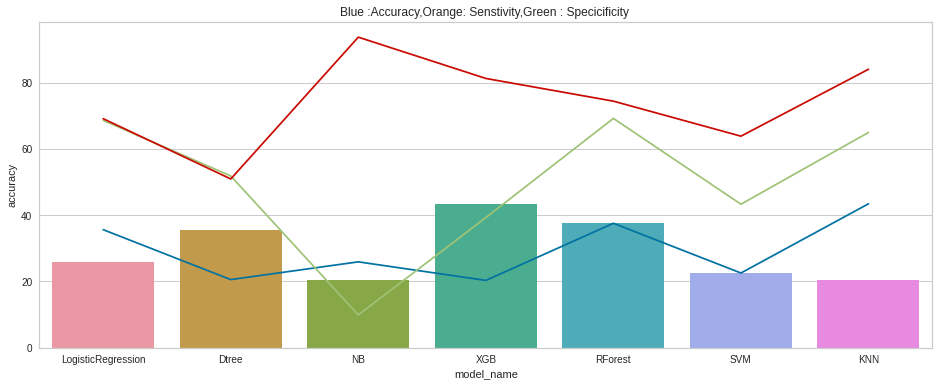

In [0]:
fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test)

In [0]:
import random
random.seed(1)
!pip install -q git+https://github.com/tensorflow/docs
from sklearn.model_selection import train_test_split
import pandas as pd
import pydot
import keras
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
tf.random.set_seed(1)

!pip install git+git://github.com/keras-team/keras.git --upgrade --no-deps

Using TensorFlow backend.


  Cloning git://github.com/keras-team/keras.git to /tmp/pip-req-build-uh7zp994
  Running command git clone -q git://github.com/keras-team/keras.git /tmp/pip-req-build-uh7zp994
  Created wheel for Keras: filename=Keras-2.3.1-cp36-none-any.whl size=365124 sha256=85c578bc23c5ebfa2821753f276a57972d2500bdd7281e4c9ad95e93400b3827
  Stored in directory: /tmp/pip-ephem-wheel-cache-9y6r0w4a/wheels/e6/02/ad/5e8e1a5824af71082e2260fe7e2eaa1b745c34706e6ff0a14b
Successfully built Keras
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
df=liar_clean
X=df.loc[:,df.columns!='label_code']
Y=df.loc[:,df.columns=='label_code']
train_dataset, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [0]:
from keras.layers import Dense,Dropout, Flatten
def build_model():

  # model = tensorflow.keras.Sequential()
  model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation='sigmoid')
  ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                # optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model=build_model()

In [0]:
EPOCHS = 100

history = model.fit(
  train_dataset, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:4.5283,  mae:1.6608,  mse:4.5283,  val_loss:4.4808,  val_mae:1.6547,  val_mse:4.4808,  
....................................................................................................

In [0]:
model.predict(X_test)


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [0]:
tf.cast(tf.equal(test_predictions, Y_test), dtype=tf.float32)
# accuracy_score(Y_test, test_predictions,normalize=True, sample_weight=None)*100

NameError: ignored